In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = "/content/gdrive/MyDrive/Batik Dataset Enhanched/Batik"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=270,
                                   zoom_range=0.2,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='wrap',
                                   validation_split=0.25)


In [ ]:
train_generator = train_datagen.flow_from_directory(data_dir,
                                                    target_size=(224,224),
                                                    shuffle=True,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(data_dir,
                                                         target_size=(224, 224),
                                                         color_mode='rgb',
                                                         class_mode='categorical',
                                                         subset='validation')

Found 774 images belonging to 20 classes.
Found 246 images belonging to 20 classes.


In [ ]:
base_model = tf.keras.applications.VGG16(
    include_top=True, weights='imagenet', pooling="max",
    classifier_activation='softmax'
)

model = tf.keras.models.Sequential()

for layer in base_model.layers[:-1]:
    model.add(layer)    

# Freeze the layers 
for layer in model.layers:
    layer.trainable = False

# Add 'softmax' instead of earlier 'prediction' layer.
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(20, activation='softmax'))

model.summary()

553467904/553467096 [==============================] - 18s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
______________________________________________________

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["acc"])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        # Your Code
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.95):
                print("\nReached 95% so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=500, steps_per_epoch=15, callbacks=[callbacks])

Epoch 1/500
15/15 [==============================] - 451s 28s/step - loss: 3.7818 - acc: 0.0576 - val_loss: 3.0016 - val_acc: 0.1138
Epoch 2/500
15/15 [==============================] - 117s 8s/step - loss: 3.0248 - acc: 0.0975 - val_loss: 2.8960 - val_acc: 0.1504
Epoch 3/500
15/15 [==============================] - 51s 3s/step - loss: 2.8836 - acc: 0.1387 - val_loss: 2.7068 - val_acc: 0.2398
Epoch 4/500
15/15 [==============================] - 34s 2s/step - loss: 2.6837 - acc: 0.2439 - val_loss: 2.4494 - val_acc: 0.3008
Epoch 5/500
15/15 [==============================] - 25s 2s/step - loss: 2.6065 - acc: 0.2188 - val_loss: 2.4939 - val_acc: 0.2602
Epoch 6/500
15/15 [==============================] - 23s 2s/step - loss: 2.5051 - acc: 0.2797 - val_loss: 2.5384 - val_acc: 0.2805
Epoch 7/500
15/15 [==============================] - 22s 1s/step - loss: 2.6697 - acc: 0.2376 - val_loss: 2.5097 - val_acc: 0.2967
Epoch 8/500
15/15 [==============================] - 20s 1s/step - loss: 2.4464 

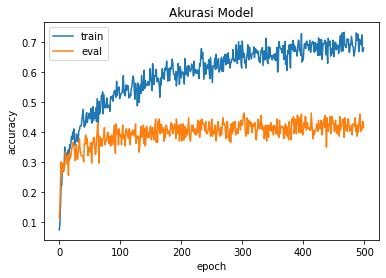

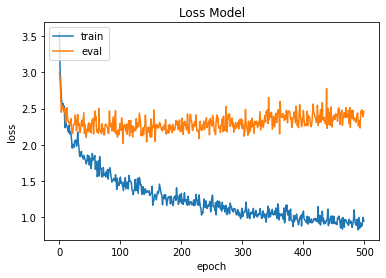

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plotting
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()

# Loss plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()